<a href="https://colab.research.google.com/github/bforsbe/SK2534/blob/main/pKa_pI_protonation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Charged residues, pH, and protonation equilibria

Proteins rely heavily on **charged amino acids** for their structure and function:

- **Asp, Glu**: usually negatively charged (deprotonated) at neutral pH  
- **Lys, Arg, His**: often positively charged (protonated)  
- **Cys, Tyr**: can ionize depending on conditions (we will get back to this)  

These residues are at the center of many specific interactions, like charge protein-protein interfaces and binding metal ions or ligands (like drug compounds). It is thus important to understand them a bit better, especially if we are going to simulate them. The characteristics of their charge state is e.g. important for:
- Folding stability  
- Enzyme catalysis  
- Protein–protein and protein–DNA interactions  

So what determines if they are charged or not? Their charge is fundamentally a balance or chemical equilibrium centered around protonation. This makes it fundamentally dependent on pH. In fact,

> postively charged amino acids are bases

and

> negatively charged amino acids are acids

this is perhaps not so surprising given the name "amino **acid**", but deserves to be mentioned. Given this, let's recap basic (no pun intended) chemistry of pH.

### what is pH?


---

### pH in human biology
- Blood plasma: **pH ~7.4**  
- Cytosol: **pH ~7.2**  
- Lysosomes: **pH ~4.5–5.0** (acidic interior)  
- Mitochondrial matrix: **pH ~7.8**  
- Stomach: **pH ~1–2**  

So proteins encounter a wide range of proton concentrations, and their side-chain protonation states adjust accordingly.

---

## Part 1 — pKa and protonation

The **pKa** of a titratable group is the pH at which it is 50% protonated.

We can calculate the **fraction protonated** using the Henderson–Hasselbalch relation.

---

### Challenge 1: Derive the protonated fraction

Starting from the acid dissociation equilibrium

$$ HA \rightleftharpoons A^- + H^+ $$

and the definition of the acid dissociation constant

$$ K_a = \frac{[A^-][H^+]}{[HA]}, $$

**derive an expression for the protonated fraction**

$$ f_{prot} = \frac{[HA]}{[HA] + [A^-]} $$

in terms of pH and pKa.

(Hint: Use $\mathrm{p}K_a = -\log_{10}K_a$ and $\mathrm{pH} = -\log_{10}[H^+]$.)

<details>
<summary><b>Solution</b></summary>

From the equilibrium:

$$ \frac{[A^-]}{[HA]} = \frac{K_a}{[H^+]} $$

So

$$ f_{prot} = \frac{1}{1 + [A^-]/[HA]} = \frac{1}{1 + K_a/[H^+]} $$

Now substitute $K_a = 10^{-pK_a}$ and $[H^+] = 10^{-pH}$:

$$ f_{prot} = \frac{1}{1 + 10^{pH - pK_a}}. $$

This is the standard formula: at pH = pKa the fraction is 0.5, below pKa it approaches 1, above pKa it approaches 0.

</details>

## Part 2 — Plotting protonation curves

Let's visualize the protonation fractions for common amino acid side chains.

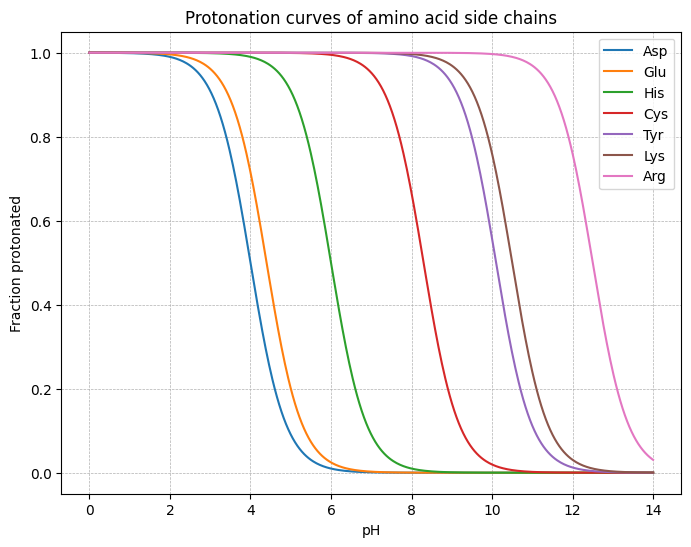

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def frac_prot(pH, pKa):
    return 1 / (1 + 10**(pH - pKa))

pH_range = np.linspace(0, 14, 500)
pKas = {
    "Asp": 4.0,
    "Glu": 4.4,
    "His": 6.0,
    "Cys": 8.3,
    "Tyr": 10.1,
    "Lys": 10.5,
    "Arg": 12.5,
}

plt.figure(figsize=(8,6))
for aa, pKa in pKas.items():
    plt.plot(pH_range, frac_prot(pH_range, pKa), label=aa)
plt.xlabel("pH")
plt.ylabel("Fraction protonated")
plt.title("Protonation curves of amino acid side chains")
plt.legend()
plt.grid(True, ls="--", lw=0.5)
plt.show()

**Question**
If cysteine (Cys) and tyrosine(Tyr) have pKa values in the same range as the charged amino acids, why are they not classified as charged themselves?
<details>
  <summary> Answer (click to expand)</summary>
  <p>Because the chemistry involved means that at neutral pH (~7), cystein and tyrosine are neutral, as their protonation results in net zero charge of the protonated group. Deprotonation would result in negative charge, which happens at high pH. </p>
</details>


---

## Part 3 — pI of a peptide

To find the isoelectric point (pI), we can calculate the net charge as a function of pH, then find the pH where it crosses zero.

### Challenge 2: Toy peptide
Consider a peptide with one Asp (pKa = 4) and one Lys (pKa = 10.5).  
- Below pH 4: net charge = +1 (Lys protonated, Asp neutral).  
- Between 4 and 10.5: net charge = 0 (Lys protonated, Asp deprotonated).  
- Above 10.5: net charge = –1 (both deprotonated).  

So the pI is roughly the midpoint: (4 + 10.5)/2 = 7.25.

In [ ]:
def net_charge(pH, acidic_groups, basic_groups):
    charge = 0.0
    for pKa in acidic_groups:
        fprot = frac_prot(pH, pKa)
        charge += (1-fprot)*(-1)
    for pKa in basic_groups:
        fprot = frac_prot(pH, pKa)
        charge += fprot*(+1)
    return charge


pH_range = np.linspace(0,14,500)
charges = [net_charge(pH, [4.0], [10.5]) for pH in pH_range]

plt.figure(figsize=(7,5))
plt.plot(pH_range, charges)
plt.axhline(0, color='k', ls='--')
plt.xlabel("pH")
plt.ylabel("Net charge")
plt.title("Net charge of Asp+Lys dipeptide")
plt.grid(True, ls="--", lw=0.5)
plt.show()

---

## Part 4 — How many hydronium ions in a simulation box?
Remeber:
> pH is a measure of the concentration of hydrogen atoms or hydronium ions in water

A handy reference to calculate anything related to the fraction of something in water based on molarity is that pure water is **~55 M**, meaning that 1L of water contains 55 moles of water molecules. For anything very dilute in water, this holds true.

- At pH 7, $[H_3O^+] = 10^{-7}\,\text{M}$, (that is what the pH *means*) so the fraction of protonated water molecules is:

$$
\frac{10^{-7}}{55} \approx 2 \times 10^{-9}
$$

So only **1 in every 500 million** water molecules is hydronium!

---

**Simulation box of side 10 nm:**

- Volume: $(10\,\text{nm})^3 = 1000\,\text{nm}^3 = 10^{-21}\,\text{L}$.
- Number of water molecules:  

$$
55\,\text{mol/L} \times 10^{-21}\,\text{L} \times N_A \approx 3 \times 10^4
$$

- Expected hydroniums at pH 7:  

$$
3 \times 10^4 \times 2 \times 10^{-9} \approx 6 \times 10^{-5}
$$

$\Rightarrow$ Far less than one hydronium per box on average.

At pH 2:  

$$
\text{fraction} = 10^{-2}/55 \approx 2 \times 10^{-4}; \quad
\text{hydronium count} \approx 3 \times 10^4 \times 2 \times 10^{-4} \approx 6
$$

Even at strongly acidic pH, only a few hydronium ions are present.

In [ ]:
def hydronium_count(pH, box_len_nm=10):
    V_L = (box_len_nm * 1e-9)**3 * 1e3
    water_conc = 55.0
    n_water = water_conc * V_L * 6.022e23
    hydronium_frac = 10**(-pH) / water_conc
    return n_water, n_water * hydronium_frac

pH_vals = np.linspace(0,14,200)
hyds = [hydronium_count(pH)[1] for pH in pH_vals]

plt.semilogy(pH_vals, hyds)
plt.xlabel("pH")
plt.ylabel("Expected hydronium ions in 10 nm box")
plt.title("Hydronium count vs. pH")
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()

---

## Part 5 — Proton exchange rate at protein surface (diffusion-limited)

Water diffuses in bulk with $D_{\text{bulk}} \approx 2 \times 10^{-9}\,\text{m}^2/\text{s}$.

In the **hydration layer at protein surfaces**, diffusion is **slowed by about 2×** compared to bulk.

Thus, we take $D_{\text{surface}} \approx D_{\text{bulk}}/2$.

Characteristic time to replace a water molecule (diameter $L \approx 0.3\,\text{nm}$):

$$
\tau_{\text{water}} \sim \frac{L^2}{6 D_{\text{surface}}}
$$

At pH 7, only 1 water in $\sim 5 \times 10^8$ is hydronium, so the effective hydronium encounter time is:

$$
\tau_{\mathrm{H_3O^+}} \approx \frac{\tau_{\text{water}}}{\text{fraction hydronium}}
$$

In [ ]:
D_bulk = 2e-9
D_surface = D_bulk / 2
L = 0.3e-9

tau_water = L**2 / (6*D_surface)
hydronium_frac = 10**(-7) / 55
tau_hydronium = tau_water / hydronium_frac

print(f"τ_water (surface): {tau_water:.2e} s (~{tau_water*1e12:.1f} ps)")
print(f"τ_hydronium at pH 7: {tau_hydronium:.2e} s (~{tau_hydronium*1e3:.1f} ms)")

---

## Part 6 — Protein interiors: dielectric effects and slowed exchange

- Water: dielectric constant $\varepsilon_r \approx 80$.  
- Protein interior: $\varepsilon_r \approx 2$–$4$.  

Coulomb interaction energy:

$$
E = \frac{1}{4\pi \varepsilon_0 \varepsilon_r} \cdot \frac{q_1 q_2}{r}
$$

Lower $\varepsilon_r$ makes electrostatic interactions much stronger, making buried charges energetically costly unless stabilized (salt bridges, H-bonds).

Inside proteins:
- Proton exchange is slower due to limited water access.  
- Protonation states can be kinetically trapped.

---

### Visualizing Coulomb energy in different dielectrics

In [ ]:
eps0 = 8.85e-12
q = 1.6e-19
r = 0.5e-9

eps_water = 80
eps_protein = 4

E_water = (1/(4*np.pi*eps0*eps_water))*q*q/r
E_protein = (1/(4*np.pi*eps0*eps_protein))*q*q/r

print(f"Coulomb energy in water: {E_water:.2e} J (~{E_water/1.6e-19:.2f} eV)")
print(f"Coulomb energy in protein interior: {E_protein:.2e} J (~{E_protein/1.6e-19:.2f} eV)")
print(f"Ratio (protein/water): {E_protein/E_water:.1f}×")